In [2]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2020-07-31 16:19:38--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  12.3MB/s    in 22s     

2020-07-31 16:20:00 (13.8 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors'
os.mkdir('/tmp/rockpaperscissors/train')
os.mkdir('/tmp/rockpaperscissors/val')
os.mkdir('/tmp/rockpaperscissors/train/paper')
os.mkdir('/tmp/rockpaperscissors/train/rock')
os.mkdir('/tmp/rockpaperscissors/train/scissors')
os.mkdir('/tmp/rockpaperscissors/val/paper')
os.mkdir('/tmp/rockpaperscissors/val/rock')
os.mkdir('/tmp/rockpaperscissors/val/scissors')

In [4]:
filepaper = os.listdir('/tmp/rockpaperscissors/paper')
filerock = os.listdir('/tmp/rockpaperscissors/rock')
filescissors = os.listdir('/tmp/rockpaperscissors/scissors')
banyakpaper = len(filepaper)
banyakrock = len(filerock)
banyakscissors = len(filescissors)

In [ ]:
os.listdir('/tmp/rockpaperscissors/')
#os.listdir('/tmp/rockpaperscissors/train')

['train',
 'val',
 'README_rpc-cv-images.txt',
 'rock',
 'scissors',
 'rps-cv-images',
 'paper']

In [ ]:
print (banyakpaper)
print (banyakrock)
print (banyakscissors)

712
726
750


In [5]:
import os, shutil, random

paper_dir = '/tmp/rockpaperscissors/paper/'
rock_dir = '/tmp/rockpaperscissors/rock/'
scissors_dir = '/tmp/rockpaperscissors/scissors/'
output_train_paper_dir = '/tmp/rockpaperscissors/train/paper'
output_val_paper_dir = '/tmp/rockpaperscissors/val/paper'
output_train_rock_dir = '/tmp/rockpaperscissors/train/rock'
output_val_rock_dir = '/tmp/rockpaperscissors/val/rock'
output_train_scissors_dir = '/tmp/rockpaperscissors/train/scissors'
output_val_scissors_dir = '/tmp/rockpaperscissors/val/scissors'
def getRandomFile(path):
  files = os.listdir(path)
  index = random.randrange(0, len(files))
  return files[index]
for subdir, dir, files in os.walk(paper_dir):
    if files:
        for x in range(int(len(files) * .60)):
            shutil.move(paper_dir + getRandomFile(paper_dir), output_train_paper_dir)
        for x in range(int(len(files) * .40)):
            shutil.move(paper_dir + getRandomFile(paper_dir), output_val_paper_dir)
for subdir, dir, files in os.walk(rock_dir):
    if files:
        for x in range(int(len(files) * .60)):
            shutil.move(rock_dir + getRandomFile(rock_dir), output_train_rock_dir)
        for x in range(int(len(files) * .40)):
            shutil.move(rock_dir + getRandomFile(rock_dir), output_val_rock_dir)
for subdir, dir, files in os.walk(scissors_dir):
    if files:
        for x in range(int(len(files) * .60)):
            shutil.move(scissors_dir + getRandomFile(scissors_dir), output_train_scissors_dir)
        for x in range(int(len(files) * .40)):
            shutil.move(scissors_dir + getRandomFile(scissors_dir), output_val_scissors_dir)

In [6]:
file_train_paper = os.listdir('/tmp/rockpaperscissors/train/paper')
file_train_rock = os.listdir('/tmp/rockpaperscissors/train/rock')
file_train_scissors = os.listdir('/tmp/rockpaperscissors/train/scissors')
file_val_paper = os.listdir('/tmp/rockpaperscissors/val/paper')
file_val_rock = os.listdir('/tmp/rockpaperscissors/val/rock')
file_val_scissors = os.listdir('/tmp/rockpaperscissors/val/scissors')
print (len(file_val_paper))
print (len(file_val_rock))
print (len(file_val_scissors))
print (len(file_train_paper))
print (len(file_train_rock))
print (len(file_train_scissors))

284
290
300
427
435
450


Codingan ML

In [7]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_paper_dir = '/tmp/rockpaperscissors/train/paper'
train_rock_dir = '/tmp/rockpaperscissors/train/rock'
train_scissors_dir = '/tmp/rockpaperscissors/train/scissors'
validation_paper_dir = '/tmp/rockpaperscissors/val/paper'
validation_rock_dir = '/tmp/rockpaperscissors/val/rock'
validation_scissors_dir = '/tmp/rockpaperscissors/val/scissors'
train_dir = '/tmp/rockpaperscissors/train'
validation_dir = '/tmp/rockpaperscissors/val'
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    width_shift_range=0.2,
    height_shift_range=0.2
)
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    width_shift_range=0.2,
    height_shift_range=0.2
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical'
)
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3), padding='same'),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    tf.keras.layers.Flatten(),
                                    #tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adamax(),
              metrics=['accuracy'])
model_check = tf.keras.callbacks.ModelCheckpoint('/tmp/rockpaperscissors', monitor='accuracy', mode='max', verbose=1, save_best_only=True)
training = model.fit(
    train_generator,
    steps_per_epoch=75,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=10,
    verbose=2,
    callbacks = [model_check]
)

Found 1312 images belonging to 3 classes.
Found 874 images belonging to 3 classes.
Epoch 1/30

Epoch 00001: accuracy improved from -inf to 0.29667, saving model to /tmp/rockpaperscissors
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /tmp/rockpaperscissors/assets
75/75 - 30s - loss: 1.1092 - accuracy: 0.2967 - val_loss: 1.0999 - val_accuracy: 0.2750
Epoch 2/30

Epoch 00002: accuracy improved from 0.29667 to 0.33333, saving model to /tmp/rockpaperscissors
INFO:tensorflow:Assets written to: /tmp/rockpaperscissors/assets
75/75 - 29s - loss: 1.0990 - accuracy: 0.3333 - val_loss: 1.0938 - val_accuracy: 0.5000
Epoch 3/30

Epoch 00003: accuracy did not improve from 0.33333
75/75 - 28s - loss: 1.0991 - accuracy: 0.3333 - val_loss: 1.0957 - val_accuracy: 0.3250
Epoch 4/30

Epoch 00004: accuracy improved from 0.33333 to 0.39667, saving model to /tmp/rockpaperscissors
INFO:tensorflow:Assets written to: /tmp/rockpaperscissors/ass

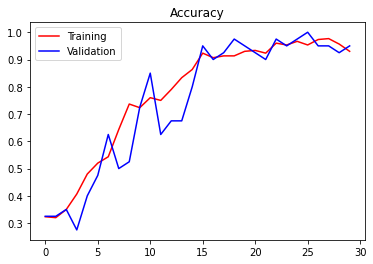

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
accuracy = training.history['accuracy']
validation_accuracy = training.history['val_accuracy']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training')
plt.plot(epochs, validation_accuracy, 'b', label='Validation')
plt.title('Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['assets',
 'train',
 'saved_model.pb',
 'val',
 'README_rpc-cv-images.txt',
 'rock',
 'scissors',
 'rps-cv-images',
 'variables',
 'paper']

In [ ]:
print(train_generator.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}


In [1]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
uploaded = files.upload()
for fn in uploaded:
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
images = np.vstack([x])
best_model = tf.keras.models.load_model('/tmp/rockpaperscissors')
classes = best_model.predict(images, batch_size=10)
if classes[0][0]==True:
  print('Paper')
elif classes[0][1]==True:
  print('Rock')
else:
  print('Scissors')

plt.imshow(img)

Using TensorFlow backend.


Saving 20200109_220314.jpg to 20200109_220314.jpg


KeyboardInterrupt: ignored